# From Data to Intervention: Predicting Student Dropout Risk Using Machine Learning


## 1. Problem Definition and Scoping

### Business or Real-World Context

Student dropout is a major challenge for educational institutions worldwide. When students leave before completing their program, the consequences are significant:
- Financial loss for institutions
- Decreased institutional reputation
- Reduced graduation rates
- Negative long-term economic outcomes for students

Many institutions rely on reactive approaches, such as intervening only after academic failure becomes visible. However, by the time poor performance is evident, it is often too late for such remedial actions.

This project aims to shift from reactive to proactive intervention.


### Decision to Be Enabled

This model is intended to enable early intervention decisions.

If we can predict which students are at risk of dropping out, then:
- academic advisors can prioritize outreach
- institutions can allocate tutoring or financial aid strategically
- administrators can design targeted retention programs

As such, the model’s output is not meant to replace human judgment. Instead, it is meant to act as a decision support tool to identify high-risk students earlier in their academic journey.

### ML Framing

This problem is framed as a **Supervised multiclass classification task**, where the outcome variable includes three possible categories: **Dropout**, **Enrolled**, and **Graduate**. For the purpose of early-risk intervention, I'll later collapse the outcome into a binary classification problem: **Dropout** vs. **Non-Dropout**.


### Success Criteria

The sucess of the models will be evaluated using:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC

However, because dropout prediction is a high-stakes classification problem, particular emphasis will be placed on **Recall for the Dropout class**. That's because missing an at-risk student (false negative) is more costly than incorrectly flagging a safe student as being at risk of dropping out.

The baseline model will establish a performance benchmark. Subsequent models must outperform this benchmark to be considered better.


## 2. Data Collection and Sourcing

### Dataset

This project uses the **“Predict Students’ Dropout and Academic Success”** dataset from the UCI Machine Learning Repository.

The dataset was collected to analyze student performance and academic outcomes in higher education. It includes demographic, academic, and institutional attributes, along with final student status outcomes.

This dataset is publicly available for research and educational use.

### Dataset Origin
URL: https://archive.ics.uci.edu/dataset/697/predict%2Bstudents%2Bdropout%2Band%2Bacademic%2Bsuccess


### Dataset Description

The dataset contains the following information:
- Student demographics
- Enrollment characteristics
- Academic performance indicators
- Institutional and financial attributes
- Final academic outcome

The target variable includes three classes:
- Dropout
- Enrolled
- Graduate


The dataset contains 4,424 observations, which is sufficient for supervised classification modeling. It also includes a range of demographic, academic, and institutional predictors. Finally, it is anonymized and contains no PII (Personally Identifiable Information) or PHI (Protected Health Information), although certain demographic variables may require careful fairness consideration.

## 3. Exploratory Data Analysis (EDA)

### 3.1. Loading the Data

In [14]:
import pandas as pd

df = pd.read_csv('data/data.csv', sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


The first few rows confirm that the dataset was loaded correctly using the semicolon separator. Each row corresponds to an individual student record, and the columns capture a mix of demographic, academic, institutional, and macroeconomic attributes, along with the final outcome variable (`Target`).

In [15]:
df.shape

(4424, 37)

The dataset contains **4,424 observations** and **37 columns**. Each observation represents a single student record, and the 37 columns include demographic characteristics, academic performance indicators across two semesters, institutional attributes, macroeconomic variables, and the outcome variable (`Target`).

With over four thousand records and several dozen predictors, the dataset is sufficiently large to support supervised classification modeling while remaining manageable for detailed exploratory analysis.

### 3.2. Analyzing the Structure of the Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The dataset contains 4,424 non-null entries across all 37 columns, indicating that there are no missing values at the structural level. This simplifies exploratory analysis and suggests that the dataset was preprocessed prior to publication.

Most variables are stored as numeric types:
- 29 integer (int64) columns
- 7 floating-point (float64) columns
- 1 object column (`Target`)


Although many features are encoded as integers, several likely represent categorical variables (e.g., `Marital status`, `Course`, `Gender`, etc.).

The `Target` column is the only object-type variable and contains the categorical outcome labels (`Dropout`, `Enrolled`, `Graduate`), which will serve as the dependent variable for classification.

At this stage, the dataset appears structurally complete and ready for deeper exploratory analysis.

### 3.3. Analyzing the Target Variable

In [17]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

The target variable consists of three outcome categories:
- **Graduate**: 2,209 students
- **Dropout**: 1,421 students
- **Enrolled**: 794 students


Graduates represent approximately half of the dataset, while dropouts account for roughly one-third. The **"Enrolled"** group is the smallest class.

This distribution indicates a **moderately imbalanced multiclass problem**, although not severely skewed. The presence of a substantial number of dropout cases provides sufficient signal for modeling dropout risk. However, the smaller size of the enrolled group suggests that class imbalance may influence performance metrics in later stages.

From an intervention perspective, the dropout group is large enough to justify targeted modeling efforts.

Now let’s enhance this with a visualization.

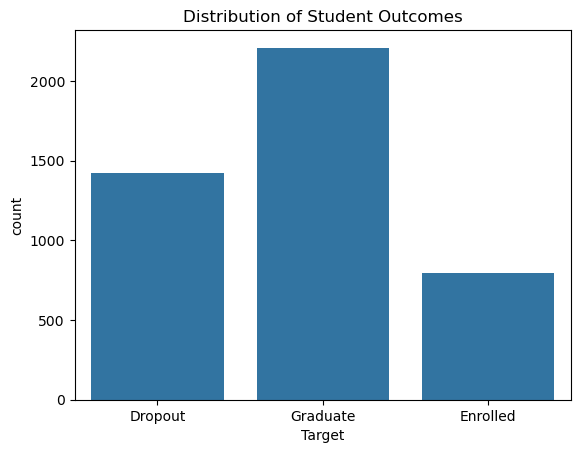

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df)
plt.title('Distribution of Student Outcomes')
plt.savefig('images/student-outcomes.png')
plt.show()

The visualization confirms that **Graduate** is the most common outcome, followed by **Dropout**, with **Enrolled** representing the smallest group. 

Importantly, the dropout class represents a substantial portion of the dataset (**approximately 32%**). This is significant. It means that dropout is not a rare event in the dataset; instead, it is an recurring event that reinforces the need for early-risk identification and intervention.

### 3.4. Inspecting the Structure of the Features

#### Identifying Structural Patterns

In [19]:
df.nunique().sort_values()

Daytime/evening attendance\t                        2
Displaced                                           2
Debtor                                              2
Educational special needs                           2
International                                       2
Scholarship holder                                  2
Gender                                              2
Tuition fees up to date                             2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Curricular units 2nd sem (without evaluations)     10
Unemployment rate                                  10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Course                                             17
Previous qualification                             17
Application mode            

Examining the number of unique values per feature reveals important structural distinctions within the dataset.
Several variables have only **two unique values**, indicating binary categorical features, such as:
- Daytime/evening attendance
- Displaced
- Debtor
- Educational special needs
- International
- Scholarship holder
- Gender
- Tuition fees up to date

These are likely encoded categorical indicators.

Other variables show **low-to-moderate cardinality** (e.g., `Marital status`, `Application mode`, `Course`, `Previous qualification`), suggesting nominal or ordinal categorical attributes encoded numerically.

In contrast, certain variables exhibit **high cardinality**, including:
- Admission grade
- Curricular units (1st and 2nd semester) grades
- Previous qualification (grade)

These are clearly continuous academic performance measures.

Overall, the dataset contains a mix of:
- Binary categorical features
- Multi-class categorical features
- Ordinal features
- Continuous academic performance indicators

This structural diversity suggests that dropout risk may be influenced by a combination of demographic, socioeconomic, academic, and contextual factors.

#### Describing Features

In [20]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


The descriptive statistics provide some interesting patterms into the dataset. Several observations stand out.

- Second semester grades range from 0 to 18.57, which suggests a grading scale of `0` to `20`.
- Second semester grades have a standard deviation of **5.21**, which indicates meaningful variation in students' academic performance.
- The average number of enrolled curricular units for the second semester is approximately `6.23`.
- The average number of approved curricular unit for the second semester is `4.43`, suggesting some differences in academic success rates.
- Several curricular units have minimum values of `0`. This indicates that some students had no approved or evaluated units, which may be strongly associated with dropout risk.

Overall, academic performance metrics appear to play a central role in predicting dropout risk.

Let's now perform some target-feature comparisons between the first and second semesters.


#### Performing Target-Feature Comparisons

In [21]:
df.groupby('Target')['Curricular units 1st sem (approved)'].mean()

Target
Dropout     2.551724
Enrolled    4.318640
Graduate    6.232232
Name: Curricular units 1st sem (approved), dtype: float64

In [22]:
df.groupby('Target')['Curricular units 2nd sem (approved)'].mean()

Target
Dropout     1.940183
Enrolled    4.057935
Graduate    6.177003
Name: Curricular units 2nd sem (approved), dtype: float64

A clear and consistent pattern emerges when comparing the average number of approved curricular units across outcome groups.

For the **first semester**:
- Dropout: **2.55** approved units
- Enrolled: **4.32** approved units
- Graduate: **6.23** approved units


For the **second semester**:
- Dropout: **1.94** approved units
- Enrolled: **4.06** approved units
- Graduate: **6.18** approved units


In general, graduates consistently approve the highest number of units, followed by enrolled students, and finally dropouts, who approve the fewest units.

The difference is even more pronounced in the second semester, where dropouts average fewer than two approved units,  compared to more than six for graduates. This suggests that the successful completion of curricular units may be strongly associated with eventual academic outcomes.

From an intervention perspective, low approval rates in early semesters may serve as a powerful early-warning indicator for dropout risk.

Let's visualize those findings by plotting them out.

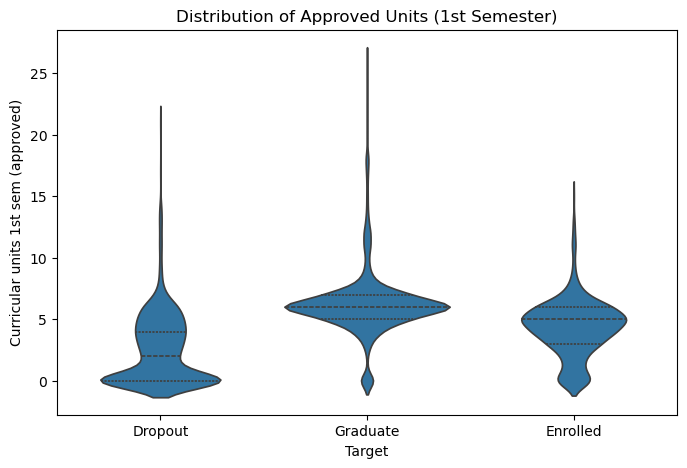

In [23]:
plt.figure(figsize=(8, 5))
sns.violinplot(
    x = 'Target',
    y = 'Curricular units 1st sem (approved)',
    data = df,
    inner = 'quartile'
)
plt.title('Distribution of Approved Units (1st Semester)')
plt.savefig('images/curricular-units-1st-semester.png')
plt.show()


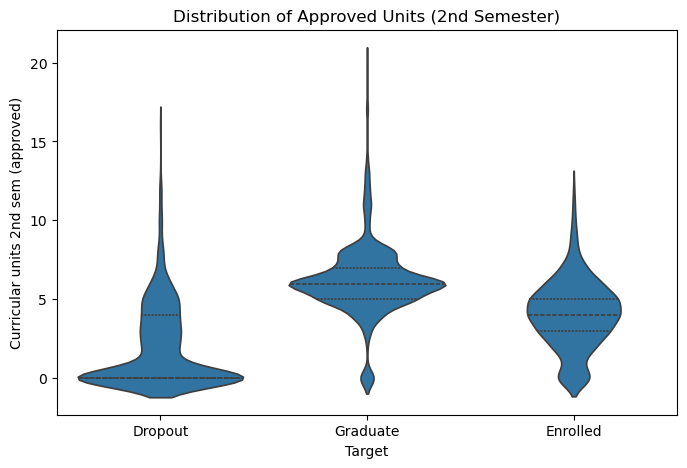

In [24]:
plt.figure(figsize=(8, 5))
sns.violinplot(
    x = 'Target',
    y = 'Curricular units 2nd sem (approved)',
    data = df,
    inner = 'quartile'
)
plt.title('Distribution of Approved Units (2nd Semester)')
plt.savefig('images/curricular-units-2nd-semester.png')
plt.show()


The violin plots of first and second semester curricular units reveal a clear structural separation between the different outcome groups. 

In both semesters, graduates exhibit a dense distribution centered around higher numbers of approved units, while enrolled students occupy an intermediate range.

Most importantly, the second semester distribution for dropouts appears heavily compressed near zero approved units. This indicates that many students who eventually drop out show sharply reduced academic approvals in the second semester. The visual “downward compression” of the plot suggests reinforces the hypothesis that declining academic progress may be associated with dropout risk.

Let's now analyze the effect of first and second semester grades on target outcomes.

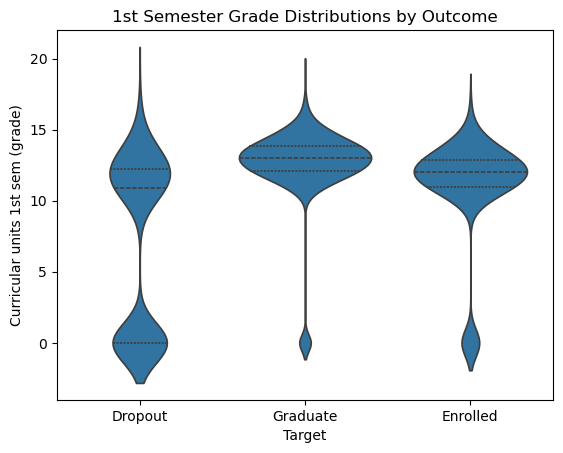

In [25]:
sns.violinplot(
    x = 'Target',
    y = 'Curricular units 1st sem (grade)',
    data = df,
    inner = 'quartile'
)
plt.title('1st Semester Grade Distributions by Outcome')
plt.savefig('images/grades-1st-semester.png')
plt.show()


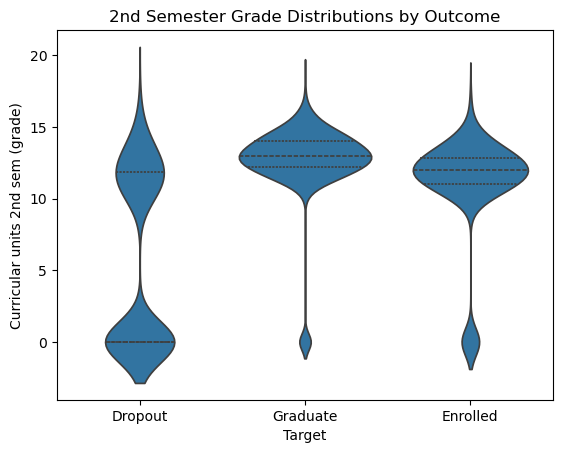

In [26]:
sns.violinplot(
    x = 'Target',
    y = 'Curricular units 2nd sem (grade)',
    data = df,
    inner = 'quartile'
)
plt.title('2nd Semester Grade Distributions by Outcome')
plt.savefig('images/grades-2nd-semester.png')
plt.show()


The violin plot of second semester grades reveals a clear separation between outcome groups.

Graduates show a dense concentration of grades centered around approximately 12–14. Enrolled students display a similar but slightly lower-centered distribution.

In contrast, the dropout group exhibits a bimodal pattern: one concentration around typical passing grades (approximately 10–13), and a second dense cluster near zero. This suggests that a substantial portion of students who eventually drop out receive extremely low grades.

The presence of a mass near zero reinforces the earlier observation that academic disengagement or failure during the second semester may be strongly associated with dropout outcomes.

So, from an intervention perspective, low grades may serve as early warning indicators.

Let's further quantify this low-grade observation.

In [27]:
df[df['Curricular units 2nd sem (grade)'] == 0]['Target'].value_counts()

Target
Dropout     727
Graduate     75
Enrolled     68
Name: count, dtype: int64

A substantial number of students have a recorded second semester grade of zero. Examining the distribution of these cases across outcomes reveals the following patterns:
- Dropout: **727 students**
- Graduate: **75 students**
- Enrolled: **68 students**

The overwhelming majority of zero-grade cases belong to the dropout group. This suggests that a second semester grade of zero is strongly associated with eventual dropout.

So, from an intervention standpoint, the presence of a zero grade in the second semester may serve as a high-priority alert signal.

Now let's compute the relative percentage of zero-grade dropouts.

In [28]:
dropout_total = df[df['Target'] == 'Dropout'].shape[0]
dropout_zero_grade = df[(df['Target'] == 'Dropout') & 
                  (df['Curricular units 2nd sem (grade)'] == 0)].shape[0]

print(f'Dropouts with zero grade: {dropout_zero_grade / dropout_total:0.2%}')


Dropouts with zero grade: 51.16%


Approximately 51% of students who eventually drop out have a second semester grade of zero.

This is a striking finding. It suggests that, for many students, dropout is associated with either complete academic disengagement or failure during the second semester. The concentration of zero-grade cases within the dropout group reinforces the earlier visual observation from the violin plot.

Most importantly, this pattern does not apply uniformly across all dropout students: nearly half of dropouts do not exhibit this zero-grade behavior, indicating that dropout may occur through multiple pathways. Some students may gradually underperform, while others may experience a more abrupt academic collapse.

From an early intervention perspective, the appearance of a zero grade in the second semester may represent a critical tipping point that would require immediate institutional response.

## 4. Data Cleaning and Preprocessing

### 4.1. Handling Missing Values

In [29]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

The dataset contains **no missing values**. So there's no need to drop any rows due to missing data.

### 4.2. Looking for Duplicate Records

In [30]:
df.duplicated().sum()

np.int64(0)

A check for duplicate rows confirms that the dataset contains **no duplicated records**.

### 4.3. Performing Column Standardization

The column standardization process will perform the following tasks:
- Remove spaces and special characters
- Correct spelling inconsistencies (i.e. `Nacionality` is misspelled)
- Improve readability by renaming some columns

In [31]:
df.columns = (
    df.columns
      .str.strip()
      .str.replace("'", "", regex = False)
      .str.replace("(", "", regex = False)
      .str.replace(")", "", regex = False)
      .str.replace("/", "_")
      .str.replace(" ", "_")
      .str.replace("-", "_")
      .str.lower()
)

df = df.rename(columns= {"nacionality": "nationality"})

df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_evening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nationality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_wit

The column names have been standardized to lowercase and reformatted to remove spaces, special characters, and parentheses. This reduces the risk of syntax errors and improves overall readability.

In addition, the “nacionality” column has been properly renamed to “nationality”.

### 4.4. Analyzing Data Types

In [32]:
df.dtypes

marital_status                                    int64
application_mode                                  int64
application_order                                 int64
course                                            int64
daytime_evening_attendance                        int64
previous_qualification                            int64
previous_qualification_grade                    float64
nationality                                       int64
mothers_qualification                             int64
fathers_qualification                             int64
mothers_occupation                                int64
fathers_occupation                                int64
admission_grade                                 float64
displaced                                         int64
educational_special_needs                         int64
debtor                                            int64
tuition_fees_up_to_date                           int64
gender                                          

A review of the data types shows that:
- Most columns are stored as `int64`
- Several other variables are stored as `float64`
- The outcome variable (`target`) is stored as object
- Data types that are obviously categorical are all stored as `int64`

Therefore, it is necessary to update the types of categorical features before modeling.

### 4.5. Updating the Types of Categorical Features

In [33]:
categorical_cols = [
    'marital_status', 
    'application_mode', 
    'application_order',
    'course', 
    'previous_qualification', 
    'nationality',
    'mothers_qualification', 
    'fathers_qualification',
    'mothers_occupation', 
    'fathers_occupation',
    'displaced', 
    'educational_special_needs', 
    'debtor',
    'tuition_fees_up_to_date', 
    'gender',
    'scholarship_holder', 
    'international',
    'daytime_evening_attendance'
]

df[categorical_cols] = df[categorical_cols].astype('category')

df.dtypes


marital_status                                  category
application_mode                                category
application_order                               category
course                                          category
daytime_evening_attendance                      category
previous_qualification                          category
previous_qualification_grade                     float64
nationality                                     category
mothers_qualification                           category
fathers_qualification                           category
mothers_occupation                              category
fathers_occupation                              category
admission_grade                                  float64
displaced                                       category
educational_special_needs                       category
debtor                                          category
tuition_fees_up_to_date                         category
gender                         

All categorical columns have been set to the **"category"** type. This is the appropriate type for variables that take on a limited, or usually fixed, number of possible values.

### 4.6. Assessing Data Leakage

Exploratory analysis revealed that second semester academic variables, particulary grades, show strong separation between the outcome groups. However, including these variables in the model would introduce potential data leakage if the goal is to identify early dropout risk.

Because this project aims to support early intervention, predictions should rely only on information available in the first semester. Therefore, all second semester academic variables will be excluded from modeling.

This ensures that the model reflects a realistic institutional use case: identifying at-risk students early enough to intervene meaningfully.

So let's remove second semester data from the dataset.

In [34]:
second_semester_cols = [
    'curricular_units_2nd_sem_credited',
    'curricular_units_2nd_sem_enrolled',
    'curricular_units_2nd_sem_evaluations',
    'curricular_units_2nd_sem_approved',
    'curricular_units_2nd_sem_grade',
    'curricular_units_2nd_sem_without_evaluations'
]

df = df.drop(columns=second_semester_cols)
df.shape

(4424, 31)

After removing second semester academic variables, the dataset now contains **4,424 observations** and **31 features**.

### 4.7. Transforming the Target Feature

The original target variable contains three outcome categories: **Dropout**, **Graduate**, and **Enrolled**.

Because the objective of this project is to determine whether a student is at risk of dropping out, the problem is reframed as a binary classification task with two outcomes: **Dropout** and **Non-dropout**. In this context, students who have either graduated or who remain enrolled are treated as non-dropouts.

The target variable is therefore transformed as follows:
- **Dropout** → 1
- **Graduate or Enrolled** → 0

This transformation aligns the modeling objective with the early-intervention goal of identifying students who are at risk of leaving the institution.

In [35]:
df['target'] = df['target'].apply(
    lambda x: 1 if x == 'Dropout' else 0
)

df['target'].value_counts()

target
0    3003
1    1421
Name: count, dtype: int64

After collapsing the original multiclass outcome into a binary variable, the class distribution is as follows:

- **Non-Dropout (0)**: 3,003 students
- **Dropout (1)**: 1,421 students

Dropout cases represent approximately **32%** of the dataset, indicating a moderately imbalanced classification problem. 

## 5. Feature Engineering

### 5.1. Creating the Feature and Target Variables


In [36]:
X = df.drop(columns = ['target'])
y = df['target']

The dataset has been separated into feature variables (`X`) and the binary target variable (`y`).

### 5.2. Engineering Domain-Driven Features

We now create some features that reflect clear hypotheses.

In [44]:
import numpy as np

# Approval rate (1st semestere)
X['approval_rate_1st_sem'] = np.where(
    X['curricular_units_1st_sem_enrolled'] > 0,
    X['curricular_units_1st_sem_approved'] /
    X['curricular_units_1st_sem_enrolled'],
    0
)

# Evaluation participation rate
X['evaluation_participation_rate'] = np.where(
    X['curricular_units_1st_sem_enrolled'] > 0,
    X['curricular_units_1st_sem_evaluations'] /
    X['curricular_units_1st_sem_enrolled'],
    0
)

# Financial risk flag
X['financial_risk_flag'] = (
    (X['debtor'] == 1) &
    (X['tuition_fees_up_to_date'] == 0)
).astype(int)


Three domain-driven features have been introduced:

1. **Approval Rate (1st Semester).**
Measures academic efficiency relative to workload. Lower approval rates may signal academic struggle.

2. **Evaluation Participation Rate.**
Captures engagement behavior. Students enrolling in courses but not attending evaluations may be disengaging.

3. **Financial Risk Flag.**
Combines debtor status and tuition standing to represent financial stress. Students experiencing financial stress may be at higher risk of dropout.

Please note that these features express relationships that are already present in the data. They simply present them  in a more interpretable form. No additional interaction terms are introduced to avoid unnecessary complexity at the baseline stage.

### 5.3. Defining Numeric and Categorical Groups

In [45]:
categorical_columns = X.select_dtypes(include = ['category']).columns.tolist()
numeric_columns = X.select_dtypes(exclude = ['category']).columns.tolist()

print(f'Categorical columns: {categorical_columns}')
print(f'\nNumeric columns: {numeric_columns}')

Categorical columns: ['marital_status', 'application_mode', 'application_order', 'course', 'daytime_evening_attendance', 'previous_qualification', 'nationality', 'mothers_qualification', 'fathers_qualification', 'mothers_occupation', 'fathers_occupation', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'international']

Numeric columns: ['previous_qualification_grade', 'admission_grade', 'age_at_enrollment', 'curricular_units_1st_sem_credited', 'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade', 'curricular_units_1st_sem_without_evaluations', 'unemployment_rate', 'inflation_rate', 'gdp', 'approval_rate_1st_sem', 'evaluation_participation_rate', 'financial_risk_flag']


The features have been grouped according to their semantic data types:
- Categorical variables will be one-hot encoded.
- Numeric variables will be standardized.

This will allow them to be properly transformed in the modeling pipeline.

### 5.4. Defining the Processing Pipeline

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_columns),
        ('numeric', StandardScaler(), numeric_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('categorical',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['marital_status', 'application_mode',
                                  'application_order', 'course',
                                  'daytime_evening_attendance',
                                  'previous_qualification', 'nationality',
                                  'mothers_qualification',
                                  'fathers_qualification', 'mothers_occupation',
                                  'fathers_occupation', 'displaced',
                                  'educational_sp...
                                  'curricular_units_1st_sem_credited',
                                  'curricular_units_1st_sem_enrolled',
                                  'curricular_units_1st_sem_evaluations',
                                  'curricular_units_1st_sem_approved',
                                  'curricular_units_1st_sem_grade',
                                  'curricular_units_1st_sem_without_evaluations',
                                  'unemployment_rate', 'inflation_rate', 'gdp',
                                  'approval_rate_1st_sem',
                                  'evaluation_participation_rate',
                                  'financial_risk_flag'])])

A preprocessing pipeline has been defined using `ColumnTransformer`:

- Categorical features have been one-hot encoded.
- Numeric features have been standardized.


## 6. Data Splitting

The dataset is split into **training** and **test** sets in the following proportions:
- **80%** Train
- **20%** Test

Because the target variable is moderately imbalanced (~32% dropouts), splits will be **stratified** to preserve class proportions across all subsets. The data is also shuffled, since records are independent student observations and there is no temporal ordering requirement.

The training set will be used to fit preprocessing and model parameters. The test set will remain untouched until final evaluation.

### 6.1. Splitting the Data into Training, Validation, and Test Sets

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.20,
    random_state = 42,
    stratify = y,
    shuffle = True
)

(X_train.shape, X_test.shape)

((3539, 33), (885, 33))

The dataset was split into:
- Training set: 3,539 observations (80%)
- Test set: 885 observations (20%)

Stratification was applied to preserve the dropout/non-dropout distribution across all subsets. And shuffling was enabled to ensure that observations were randomly distributed before splitting.

This setup allows:
- Model fitting on the training set
- Final unbiased evaluation on the test set

### 6.2. Verifying Class Distribution Across Splits

In [41]:
dist_df = pd.DataFrame({
    "train": y_train.value_counts(normalize = True),
    "test": y_test.value_counts(normalize = True)
})

dist_df.T

target,0,1
train,0.678723,0.321277
test,0.679096,0.320904


The class proportions remain consistent across the training and test sets:
- Training set: ~32.1% dropout
- Test set: ~32.1% dropout

This confirms that stratification was successful applied, ensuring that each dataset subset is representative of the overall population.

## 7. Model Selection

### 7.1. Establishing a Baseline Model

The goal of this section is to establish a baseline model that future models can be compared against.
We use **Regularized Logistic Regression** as the baseline model because it is:
- A strong, standard baseline for classification
- Interpretable (coefficients can later be mapped to risk drivers)
- Compatible with a clean preprocessing pipeline (encoding + scaling)

### 7.2. Building the Baseline Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings

baseline_pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter = 2000,
        solver = 'liblinear',
        penalty = 'l2',
        class_weight = None,
        random_state = 42
    ))
])

baseline_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['marital_status',
                                                   'application_mode',
                                                   'application_order',
                                                   'course',
                                                   'daytime_evening_attendance',
                                                   'previous_qualification',
                                                   'nationality',
                                                   'mothers_qualification',
                                                   'fathers_qualification',
                                                   'mothers_occupation',
                                                   'fathers_occupat...
                                                   'curricular_units_1st_sem_evaluations',
                                                   'curricular_units_1st_sem_approved',
                                                   'curricular_units_1st_sem_grade',
                                                   'curricular_units_1st_sem_without_evaluations',
                                                   'unemployment_rate',
                                                   'inflation_rate', 'gdp',
                                                   'approval_rate_1st_sem',
                                                   'evaluation_participation_rate',
                                                   'financial_risk_flag'])])),
                ('model',
                 LogisticRegression(max_iter=2000, random_state=42,
                                    solver='liblinear'))])

### 7.3. Evaluating the Baseline Model

In [52]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

# Predictions
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="Found unknown categories in columns .* during transform.*"
    )
    preds = baseline_pipe.predict(X_test)
    proba = baseline_pipe.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds, zero_division = 0)
rec = recall_score(y_test, preds, zero_division = 0)
f1 = f1_score(y_test, preds, zero_division = 0)
auc = roc_auc_score(y_test, proba)

print(f'Accuracy: {acc:0.4f}')
print(f'Precision: {prec:0.4f}')
print(f'Recall: {rec:0.4f}')
print(f'F1 Score: {f1:0.4f}')
print(f'ROC-AUC Score: {auc:0.4f}')


Accuracy: 0.8678
Precision: 0.8646
Recall: 0.6972
F1 Score: 0.7719
ROC-AUC Score: 0.9129


The Logistic Regression baseline demonstrates strong predictive performance on the test set. 

With an accuracy of **86.8%** and a ROC-AUC score of **0.913**, the model exhibits strong discriminatory ability between dropout and non-dropout students.

Precision for the dropout class is **86.46%**, indicating that when the model flags a student as "at-risk", it is correct most of the time. 

Recall is **69.72%**, meaning that approximately 70% of actual dropout cases are successfully identified. While this reflects solid performance, it also suggests that roughly 30% of at-risk students remain undetected.

The F1 score of **0.772** reflects a balanced trade-off between precision and recall.

Overall, the baseline model establishes a strong reference point. The high ROC-AUC score suggests that future improvements may be achieved through threshold tuning and higher-capacity models, particularly if increasing recall is prioritized for early intervention purposes.